# Getting started

## Ensembles

### Ensemble models

---

In [1]:
using Pkg; Pkg.activate("D:/JULIA/6_ML_with_Julia/A-ensembles"); Pkg.instantiate()

  Activating project at `D:\JULIA\6_ML_with_Julia\A-ensembles`


> Preliminary steps <br>
> Homogenous ensembles
> 1. Training and testing an ensemble
> 2. Systematic tuning
> 3. Reporting results

### Preliminary steps

---

Let's start by loading the relevant packages and generating some dummy data.

In [2]:
using MLJ
import DataFrames: DataFrame
using PrettyPrinting
using StableRNGs

rng = StableRNG(512)
Xraw = rand(rng, 300, 3)

300×3 Matrix{Float64}:
 0.941503    0.721724   0.328143
 0.423794    0.0423568  0.449126
 0.181315    0.767096   0.252239
 0.788659    0.21882    0.318666
 0.473444    0.531495   0.275985
 0.85171     0.18371    0.640187
 0.141996    0.934331   0.0338421
 0.577308    0.0924971  0.771955
 0.0199241   0.700031   0.101959
 0.900477    0.246024   0.387603
 0.444832    0.509509   0.342469
 0.270885    0.468182   0.14166
 0.923804    0.513764   0.00783605
 ⋮                      
 0.548699    0.736581   0.747059
 0.579349    0.204345   0.111636
 0.654865    0.275287   0.3275
 0.590148    0.0713853  0.0290355
 0.256165    0.596071   0.483203
 0.00996852  0.722794   0.402213
 0.843964    0.378416   0.542911
 0.602174    0.321716   0.350327
 0.1297      0.0684328  0.90622
 0.821579    0.873053   0.0278195
 0.498559    0.278562   0.657468
 0.130187    0.0339702  0.152995

In [3]:
y = exp.(Xraw[:, 1] - Xraw[:, 2] - 2Xraw[:, 3] + 0.1*rand(rng, 300))
X = DataFrame(Xraw, :auto)

,x1,x2,x3
,Float64,Float64,Float64
1,0.941503,0.721724,0.328143
2,0.423794,0.0423568,0.449126
3,0.181315,0.767096,0.252239
4,0.788659,0.21882,0.318666
5,0.473444,0.531495,0.275985
6,0.85171,0.18371,0.640187
7,0.141996,0.934331,0.0338421
8,0.577308,0.0924971,0.771955
9,0.0199241,0.700031,0.101959


In [4]:
train,test = partition(eachindex(y), 0.7)

([1, 2, 3, 4, 5, 6, 7, 8, 9, 10  …  201, 202, 203, 204, 205, 206, 207, 208, 209, 210], [211, 212, 213, 214, 215, 216, 217, 218, 219, 220  …  291, 292, 293, 294, 295, 296, 297, 298, 299, 300])

Let's also load a simple model:

In [5]:
KNNRegressor = @load KNNRegressor
knn_model = KNNRegressor(K = 10)

┌ Info: For silent loading, specify `verbosity=0`. 
└ @ Main C:\Users\jeffr\.julia\packages\MLJModels\tMgLW\src\loading.jl:168


import NearestNeighborModels ✔


KNNRegressor(
    K = 10,
    algorithm = :kdtree,
    metric = Distances.Euclidean(0.0),
    leafsize = 10,
    reorder = true,
    weights = NearestNeighborModels.Uniform())

As before, let's instantiate a macnine that wraps the model and data:

In [6]:
knn = machine(knn_model, X, y)

Machine{KNNRegressor,…} trained 0 times; caches data
  model: NearestNeighborModels.KNNRegressor
  args: 
    1:	Source @524 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @531 ⏎ `AbstractVector{Continuous}`


and fit it

In [7]:
fit!(knn, rows = train)
ŷ = predict(knn, X[test, :]) # or use rows = test
rms(ŷ, y[test])

┌ Info: Training Machine{KNNRegressor,…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464


0.06389980172436367

The few steps above are equivalent to just calling ```evaluate!```:

In [8]:
evaluate!(knn, resampling = Holdout(fraction_train = 0.7, rng = StableRNG(666)), measure = rms)

PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌────────────────────────┬─────────────┬───────────┬──────────┐
│ measure                │ measurement │ operation │ per_fold │
├────────────────────────┼─────────────┼───────────┼──────────┤
│ RootMeanSquaredError() │ 0.124       │ predict   │ [0.124]  │
└────────────────────────┴─────────────┴───────────┴──────────┘


### Homogenous ensembles

MLJ offers basic support for ensembling such as ```bagging```. Defining such an ensemble of simple "atomic" models is done via the ```EnsemleModel``` construction:

In [9]:
ensemble_model = EnsembleModel(model = knn_model, n = 20)

DeterministicEnsembleModel(
    model = KNNRegressor(
            K = 10,
            algorithm = :kdtree,
            metric = Distances.Euclidean(0.0),
            leafsize = 10,
            reorder = true,
            weights = NearestNeighborModels.Uniform()),
    atomic_weights = Float64[],
    bagging_fraction = 0.8,
    rng = Random._GLOBAL_RNG(),
    n = 20,
    acceleration = CPU1{Nothing}(nothing),
    out_of_bag_measure = Any[])

where the ```n=20``` indicates how many models are presents in the ensemble.

### Training and testing an ensemble

Now that we've instantiated an ensemble, it can be trained and tested the same as any other model:

In [10]:
ensemble = machine(ensemble_model, X, y)

Machine{DeterministicEnsembleModel{KNNRegressor},…} trained 0 times; caches data
  model: MLJEnsembles.DeterministicEnsembleModel{NearestNeighborModels.KNNRegressor}
  args: 
    1:	Source @054 ⏎ `Table{AbstractVector{Continuous}}`
    2:	Source @264 ⏎ `AbstractVector{Continuous}`


In [11]:
estimates = evaluate!(ensemble, resampling = CV())
estimates

Evaluating over 6 folds: 100%[=========================] Time: 0:00:00


PerformanceEvaluation object with these fields:
  measure, measurement, operation, per_fold,
  per_observation, fitted_params_per_fold,
  report_per_fold, train_test_pairs
Extract:
┌────────────────────────┬─────────────┬───────────┬────────────────────────────
│ measure                │ measurement │ operation │ per_fold                  ⋯
├────────────────────────┼─────────────┼───────────┼────────────────────────────
│ RootMeanSquaredError() │ 0.0855      │ predict   │ [0.0927, 0.111, 0.0747, 0 ⋯
└────────────────────────┴─────────────┴───────────┴────────────────────────────
                                                                1 column omitted


here the implicit measure is the ```rms``` (default for regressions). The ```measurement``` is the mean taken over the folds:

In [12]:
@show estimates.measurement[1]

estimates.measurement[1] = 0.08549444941634217


0.08549444941634217

In [13]:
@show mean(estimates.per_fold[1])

mean(estimates.per_fold[1]) = 

0.08407706743881495

0.08407706743881495


In [14]:
@show estimates.per_fold

estimates.per_fold = [[0.09273655266765406, 0.11050584019210129, 0.07471507989124739, 0.09092921743027396, 0.06649490544635518, 0.06908080900525779]]


1-element Vector{Vector{Float64}}:
 [0.09273655266765406, 0.11050584019210129, 0.07471507989124739, 0.09092921743027396, 0.06649490544635518, 0.06908080900525779]

Note that multiple measurements can be specified jointly. Here only on measurement is (implicitly) specified but we still have to select the corresponding results (whence the ```[1]``` for both the ```measurement``` and ```per_fold```).

### Systematic tuning

Let's simultaneously tune the ensemble's ```bagging_fraction``` and the K-Nearest neighbour hyperparameter ```K```. Since one of our models is a field of the other, we have nested hyperparameters:

In [15]:
params(ensemble_model) |> pprint

(model = (K = 10,
          algorithm = :kdtree,
          metric = Distances.Euclidean(0.0),
          leafsize = 10,
          reorder = true,
          weights = NearestNeighborModels.Uniform()),
 atomic_weights = [],
 bagging_fraction = 0.8,
 rng = Random._GLOBAL_RNG(),
 n = 20,
 acceleration = CPU1{Nothing}(nothing),
 out_of_bag_measure = [])

To define a tunning grid, we construct ranges for the two parameters and collate these ranges:

In [16]:
B_range = range(ensemble_model, :bagging_fraction, lower = 0.5, upper = 1.0)
K_range = range(ensemble_model, :(model.K), lower = 1, upper = 20)

NumericRange(1 ≤ model.K ≤ 20; origin=10.5, unit=9.5)

the scale for a tunning grid is linear by default but can be specified to ```:log10``` for logarithmic ranges. Now we have to define a ```Tunemodel``` and fit it:

In [17]:
tm = TunedModel(model = ensemble_model, 
                tuning = Grid(resolution = 10), # 10x10 grid
                resampling = Holdout(fraction_train = 0.8, rng = StableRNG(42)),
                ranges = [B_range, K_range])

tuned_ensemble = machine(tm, X, y)
fit!(tuned_ensemble, rows = train);

┌ Info: No measure specified. Setting measure=RootMeanSquaredError(). 
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:308
┌ Info: Training Machine{DeterministicTunedModel{Grid,…},…}.
└ @ MLJBase C:\Users\jeffr\.julia\packages\MLJBase\MuLnJ\src\machines.jl:464
┌ Info: Attempting to evaluate 100 models.
└ @ MLJTuning C:\Users\jeffr\.julia\packages\MLJTuning\Al9yX\src\tuned_models.jl:680
Evaluating over 100 metamodels: 100%[=========================] Time: 0:00:01


Note the ```rng = 42``` seeds the random number generator for reproducibility of this example.

### Reporting results

The best model can be accessed like so:

In [ ]:
best_ensemble = fitted_params(tuned_ensemble).best_model

In [19]:
@show best_ensemble.model.K

best_ensemble.model.K = 3


3

In [20]:
@show best_ensemble.bagging_fraction

best_ensemble.bagging_fraction = 0.6666666666666666


0.6666666666666666

The ```report``` method gives more detailed information on the tuning process:

In [21]:
r = report(tuned_ensemble);

For instance, ```r.measurements``` are the measurements for all pairs of hyperparameters which you could visualise nicely:

┌ Warning: `vendor()` is deprecated, use `BLAS.get_config()` and inspect the output instead
│   caller = npyinitialize() at numpy.jl:67
└ @ PyCall C:\Users\jeffr\.julia\packages\PyCall\L0fLP\src\numpy.jl:67


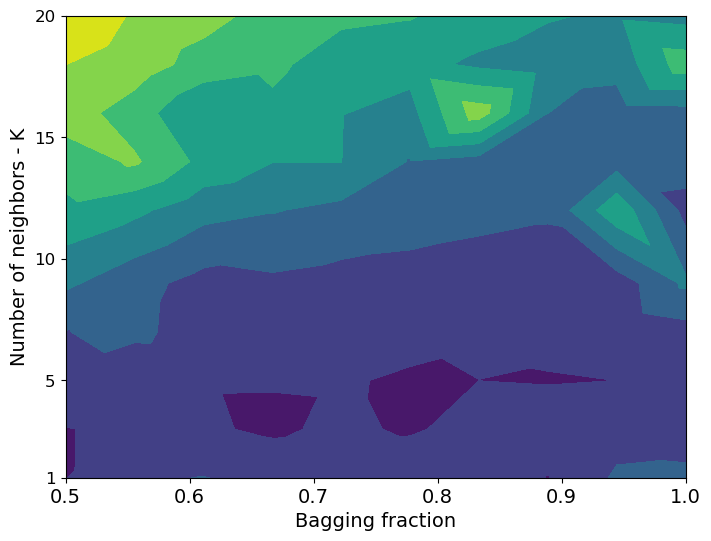

In [22]:
using PyPlot

fig = figure(figsize = (8,6))
vk
res = r.plotting
vals_b = res.parameter_values[:, 1]
vals_k = res.parameter_values[:, 2]

tricontourf(vals_b, vals_k, res.measurements)
xticks(0.5:0.1:1, fontsize = 14)
xlabel("Bagging fraction", fontsize = 14)
yticks([1, 5, 10, 15, 20], fontsize = 12)
ylabel("Number of neighbors - K", fontsize = 14)
savefig("./plots/2.4.1.png")

Finally you can always just evaluate the model by reporting ```rms``` on the test set:

In [23]:
ŷ = predict(tuned_ensemble, rows = test)
@show rms(ŷ, y[test])

rms(ŷ, y[test]) = 0.05476447843703387


0.05476447843703387